In [1]:
from tensorflow.keras.losses import Reduction
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

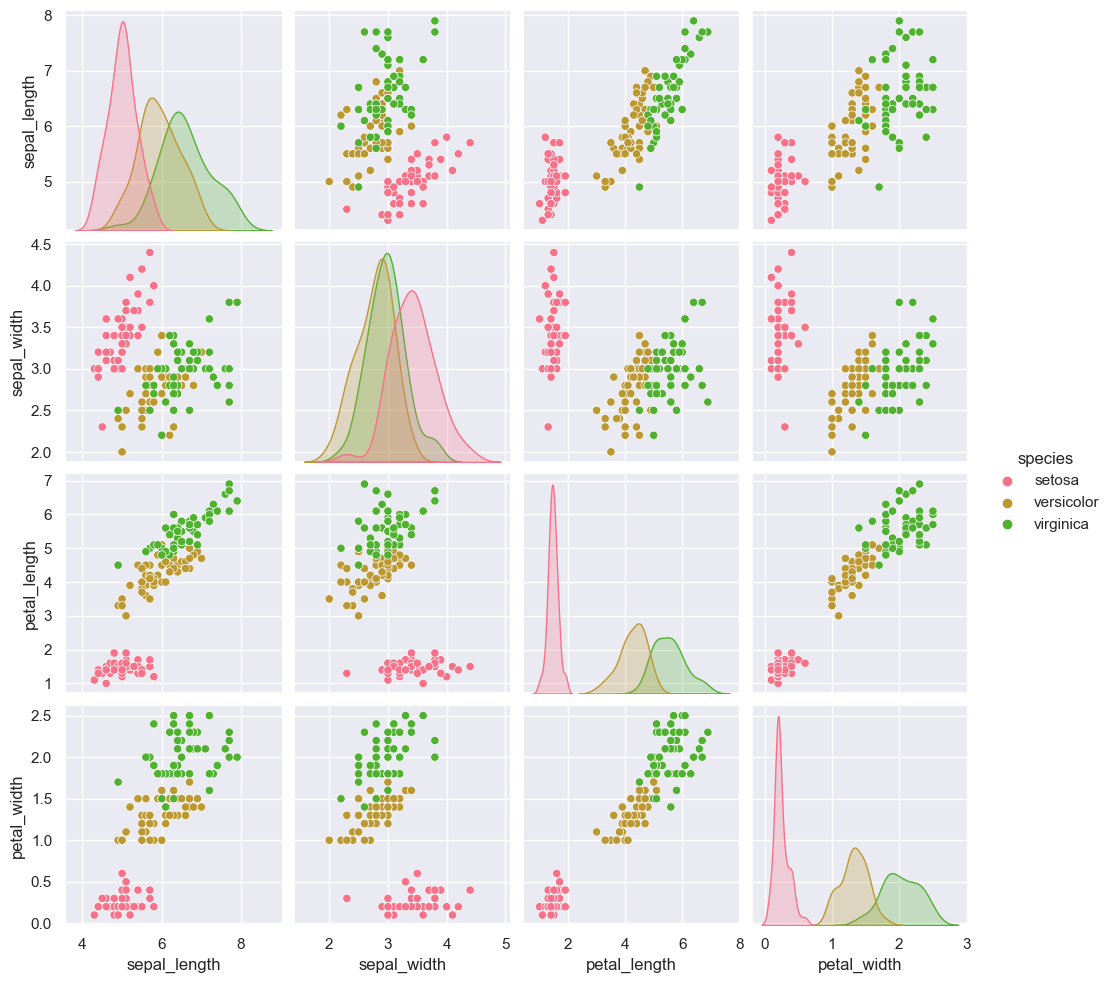

In [3]:
sns.set(style="ticks")
sns.set(palette='husl')
sns.pairplot(iris, hue='species')

In [4]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

In [5]:
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
y = pd.get_dummies(y1).values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [7]:
Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)

In [8]:
CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction=Reduction.AUTO,
    name='categorical_crossentropy'
)

In [10]:
# deklararujemy model
model = Sequential([
    Dense(4, activation='relu', input_shape=(4,)),
    Dense(3, activation='softmax')

])

# kompilujemy model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# wypisujemy wartości warstw modelu
model.summary()

"""# trenujemy model
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 3)                 15        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


'# trenujemy model\nhistory = model.fit_generator(\n    train_data_gen,\n    steps_per_epoch=total_train // batch_size,\n    epochs=epochs,\n    validation_data=val_data_gen,\n    validation_steps=total_val // batch_size\n)'

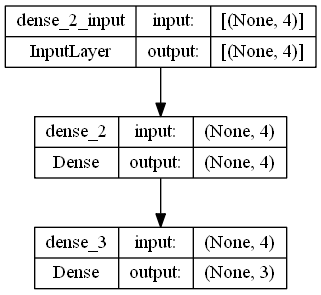

In [11]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

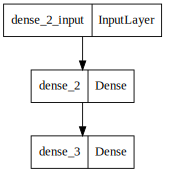

In [12]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))

In [13]:
X_train.size

480

In [14]:
y_train.size

360

In [15]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7274 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1.6386 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.5482 - accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 1.4707 - accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.3980 - accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 1.3288 - accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.2748 - accuracy: 0.3333
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 1.2230 - accuracy: 0.3333
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.1879 - accuracy: 0.3333
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1496 - accuracy: 0.4000
Epoch 11/100
4/4 [===========

In [16]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 76ms/step


In [17]:
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00        10
           2       0.50      1.00      0.67        10

    accuracy                           0.67        30
   macro avg       0.50      0.67      0.56        30
weighted avg       0.50      0.67      0.56        30

[[10  0  0]
 [ 0  0 10]
 [ 0  0 10]]


C:\Users\Admin\anaconda3\envs\downgrade\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\downgrade\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\envs\downgrade\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
